<a href="https://colab.research.google.com/github/nioclandramer/IA_ComSexista/blob/main/IA_comentSexistas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASIFICACIÓN DEL SEXISMO EN TEXTOS EN INGLÉS**


---





# 🟣 **Descripción del problema**

El siguiente trabajo se realiza a base del conjunto de datos tomado de: https://www.kaggle.com/datasets/aadyasingh55/sexism-detection-in-english-texts?resource=download

Este conjunto de datos incluye 2000 entradas de texto en inglés y 4 columnas:
* ***Text:*** Contiene al comentario.
* ***Label_sexist:*** Clasifica al comentario en sexista y no sexista.
* ***Label_category:*** Clasifica los comentarios, "***none***" si no es sexista, y si lo es, hay 4 tipos:
 1. ***Threats, plans to harm and incitement* (Amenazas)**: Expresar la intención de causar daño físico o psicológico a alguien por su género. Ej: "Te voy a pegar".
 2. ***Derogation* (Derogación)**: Despreciar o humillar a una persona por su género. Ej: "Las mujeres no saben conducir".
 3. ***Animosity* (Animosidad)**: Sentir odio o resentimiento hacia las mujeres. Ej: "Odio a las feministas".
 4. ***Prejudiced discussions* (Discusiones prejuiciosas)**: Difundir creencias falsas sobre las mujeres y justificar la desigualdad de género. Ej: "Los hombres son los jefes de la casa".

* ***Label_vector:*** Es una subcategoría, contiene: "***none***" y:
 2. 1 descriptive attacks
 2. 2 aggressive and emotive attacks
 3. 1 casual use of gendered slurs, profanities, and insults
 3. 2 immutable gender differences and gender stereotypes


**Objetivos específicos:**

Este trabajo solo se enfoca en los comentarios sexistas y en sus 4 categorías, con estos datos los objetivos son:

* **Realizar Análisis Exploratorio de Datos (EDA):** Analizar la distribución y características de los comentarios sexistas.

* **Filtrar y Preprocesar Datos Sexistas:** Extraer y normalizar los comentarios sexistas y sus categorías en un formato comprensible para la máquina.

* **Dividir el Dataset:** Separar los datos sexistas en conjuntos de entrenamiento y prueba.

* **Seleccionar y Entrenar Modelos:** Investigar y entrenar el modelos de machine learning para la clasificación de comentarios sexistas.

* **Evaluar el Modelo:** Medir el rendimiento del modelo e identificar los errores.


**Descripción de variables:**

El nuevo dataset tendrá unicamente las variables:
* ***Text* (variable predictora X):** los comentarios sexistas
* ***Label_category* (variable objetivo Y):** con sus 4 categorías

**Librerias utilizadas:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#Para graficos
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Para Preprocesamiento de datos
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Para vectorizacion de datos
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 🟢 **Obtener y entender los datos**

**Carga y extracción del dataset:**

In [ ]:
# Ruta del archivo CSV en Google Drive
dataset = "/content/drive/MyDrive/Colab Notebooks/dev.csv"


# Leer el archivo CSV en un DataFrame
datosOriginales = pd.read_csv(dataset, encoding='ISO-8859-1', nrows=100000)

# Verificar que los datos se hayan cargado correctamente
print(datosOriginales.head())

                  rewire_id  \
0   sexism2022_english-9609   
1    sexism2022_english-966   
2   sexism2022_english-3553   
3  sexism2022_english-13328   
4     sexism2022_english-81   

                                                text label_sexist  \
0  In Nigeria, if you rape a woman, the men rape ...   not sexist   
1                     I bet she wished she had a gun   not sexist   
2  I agree with that but at the same time I know ...       sexist   
3  democrats from Minnesota (leftist muzzie shith...       sexist   
4  Texas jury sentences Jordanian immigrant to de...   not sexist   

  label_category                        label_vector split  
0           none                                none   dev  
1           none                                none   dev  
2  2. derogation             2.1 descriptive attacks   dev  
3  2. derogation  2.2 aggressive and emotive attacks   dev  
4           none                                none   dev  


In [ ]:
#Extración de los comentarios sexistas más sus categorías (dos columnas):

# Filtrar las filas según el label (categoria)
filtrado = datosOriginales[datosOriginales['label_sexist'] == 'sexist']

# Seleccionar columnas específicas que conformarán los nuevos datos
# y hacer una copia
datos = filtrado[['text', 'label_category']].copy()

# Contar la cantidad de comentarios por tipo
conteo_tipos = datos['label_category'].value_counts()

# Mostrando el cambio
print(datos)

                                                   text  \
2     I agree with that but at the same time I know ...   
3     democrats from Minnesota (leftist muzzie shith...   
7              aim for the head so she dosn't come back   
9     This guys gonna have a great time in the barra...   
13                Or women can stop being lying whores.   
...                                                 ...   
1963  use your phone cam for agreement, and send the...   
1968  there's an army of simps and feminists that wi...   
1976  What normalisation? This fucking witch needs t...   
1978  The vagina is just as sensitive as the balls. ...   
1985  Imagine thinking that "Men Going Their Own Way...   

                                label_category  
2                                2. derogation  
3                                2. derogation  
7     1. threats, plans to harm and incitement  
9                                 3. animosity  
13                               2. derogation

**Análisis Exploratorio de Datos (EDA):**

<ipython-input-6-592d5ea8e497>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_tipos.index, y=conteo_tipos.values, palette=colors)


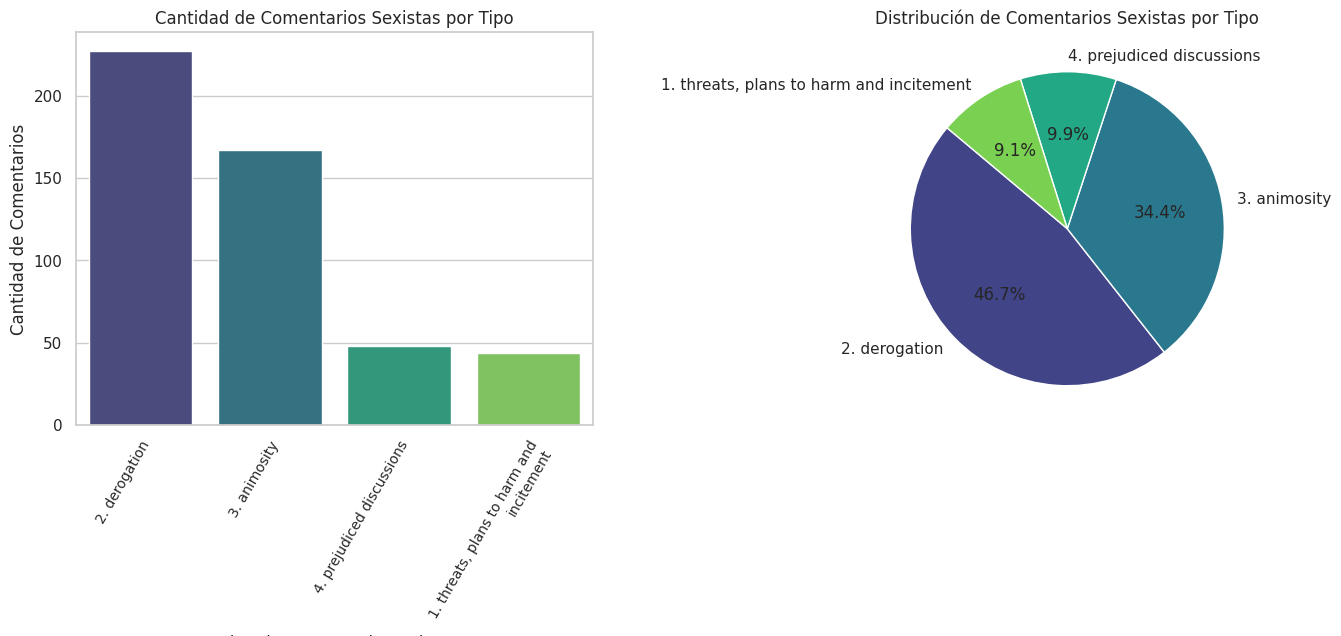

In [ ]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Ajustar el tamaño de la figura según el número de categorías
fig_width = max(14, len(conteo_tipos) * 1.5)
plt.figure(figsize=(fig_width, 6))

# configuración para el gráfico de barras
plt.subplot(1, 2, 1)
colors = sns.color_palette("viridis", len(conteo_tipos))
sns.barplot(x=conteo_tipos.index, y=conteo_tipos.values, palette=colors)
plt.xlabel('Tipo de Comentario Sexista')
plt.ylabel('Cantidad de Comentarios')
plt.title('Cantidad de Comentarios Sexistas por Tipo')

# Rotar y ajustar el tamaño de las etiquetas en el eje x
plt.xticks(rotation=60, ha='right', fontsize=10, wrap=True)

# configuración para el gráfico de pastel
plt.subplot(1, 2, 2)
plt.pie(conteo_tipos.values, labels=conteo_tipos.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Comentarios Sexistas por Tipo')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

🤔 Se observa que los datos están desbalanceados, más adelante se sabrá si esto afecta realmente a los resultados y si se deben tomar medidas al repecto

# 🔵 **Limpieza de los datos y feature engineering**


## 🔹 **Preprocesamiento de datos**

Para poder usar nuestro dataset como datos de entrenamiento, primero se debe procesar el texto que contiene siguiendo los siguientes pasos:

* **Limpieza de Datos:** Eliminar duplicados, vacíos, *(puede hacerse) corregir errores tipográficos y eliminar comentarios irrelevantes*.
* **Normalización:** Convertir todo el texto a minúsculas, eliminar puntuación, caracteres especiales y números, corregir contracciones mediante un diccionario, reemplazar mutiples espacios en blanco por uno solo.
* **Tokenización:** Dividir el texto en palabras o tokens individuales.
* **Eliminación de Stop Words:** Quitar palabra que no aportan mucho significado (como "y", "el", "de").
* **Lematización:** Reducir las palabras a su raíz.



### Limpieza de datos:

**Revisión de valores nulos:**

In [ ]:
# Contar valores nulos en cada columna
nulos = datos.isnull().sum()
print(nulos)

# Obtener un resumen del dataframe
datos.info()

text              0
label_category    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 2 to 1985
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            486 non-null    object
 1   label_category  486 non-null    object
dtypes: object(2)
memory usage: 11.4+ KB


No se encuentran valores nulos en los datos

**Revisión de filas duplicadas:**

In [ ]:
num_duplicados = datos.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

# Mostrar las filas duplicadas
if num_duplicados > 0:
    duplicados = datos[datos.duplicated(keep=False)]  # keep=False muestra todos los duplicados
    print("Filas duplicadas:")
    print(duplicados)

Número de filas duplicadas: 0


### Normalización:

In [ ]:
contractions_dict = {
        "ain't": "am not", "aren't": "are not","can't": "cannot","couldn't": "could not","didn't": "did not","doesn't": "does not","don't": "do not",
        "dont": "do not","hadn't": "had not","hasn't": "has not","haven't": "have not", "he's": "he is","he'll": "he will","he'd": "he would",
        "i've": "i have","i'm": "i am","im": "i am","isn't": "is not","it's": "it is", "it'll": "it will","i'll": "i will","i'd": "i would",
        "let's": "let us","mightn't": "might not","mustn't": "must not","shan't": "shall not","she's": "she is","she'll": "she will","she'd": "she would",
        "shouldn't": "should not","that's": "that is", "there's": "there is", "they're": "they are", "they'll": "they will","they'd": "they would",
        "we're": "we are","we'll": "we will","we'd": "we would","weren't": "were not","what's": "what is","where's": "where is","who's": "who is",
        "who'll": "who will","won't": "will not","wouldn't": "would not","you're": "you are","you'll": "you will","you'd": "you would","y'all": "you all",
        "y'know": "you know","you've": "you have"
}

def normalizar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    #Eliminar contracciones
    for contraccion, expansion in contractions_dict.items():
        texto = re.sub(r'\b' + re.escape(contraccion) + r'\b', expansion, texto)
    # Eliminar puntuación, caracteres especiales y números
    texto = re.sub(r'[^a-z\s]', '', texto)
    # Reemplazar múltiples espacios en blanco por uno solo
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Verificar los resultados
print("Antes de la normalización:")
print(datos[['text']].head(10))  # Muestra las primeras 10 filas

# Aplicar la normalización a la columna 'text'
datos['cleaned_text'] = datos['text'].apply(normalizar_texto)

print("\nDespués de la normalización:")
print(datos[['cleaned_text']].head(10))  # Muestra las primeras 10 filas

Antes de la normalización:
                                                 text
2   I agree with that but at the same time I know ...
3   democrats from Minnesota (leftist muzzie shith...
7            aim for the head so she dosn't come back
9   This guys gonna have a great time in the barra...
13              Or women can stop being lying whores.
15  until she's been around me long enough through...
19  What a nasty bitch. I wouldâve failed her on...
27  Habits are hard to die, as much as the cock ca...
36  I am with you on the False Accuser Registry. s...
39  Sheâs unstable, youâll never know when she...

Después de la normalización:
                                         cleaned_text
2   i agree with that but at the same time i know ...
3   democrats from minnesota leftist muzzie shitho...
7             aim for the head so she dosnt come back
9   this guys gonna have a great time in the barra...
13               or women can stop being lying whores
15  until she is been aro

### Tokenización:

In [ ]:
# Descargar el paquete de tokenización
nltk.download('punkt')

# Tokenizar el texto
datos['cleaned_text'] = datos['cleaned_text'].apply(word_tokenize)

# Verificar los resultados
print(datos[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                 text  \
2   I agree with that but at the same time I know ...   
3   democrats from Minnesota (leftist muzzie shith...   
7            aim for the head so she dosn't come back   
9   This guys gonna have a great time in the barra...   
13              Or women can stop being lying whores.   

                                         cleaned_text  
2   [i, agree, with, that, but, at, the, same, tim...  
3   [democrats, from, minnesota, leftist, muzzie, ...  
7   [aim, for, the, head, so, she, dosnt, come, back]  
9   [this, guys, gon, na, have, a, great, time, in...  
13       [or, women, can, stop, being, lying, whores]  


### Eliminación de Stop Words:

In [ ]:
# Descargar el conjunto de stop words
nltk.download('stopwords')

# Definir stop words en inglés
stop_words = set(stopwords.words('english'))

# Función para eliminar stop words
def eliminar_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

# Aplicar eliminación de stop words
datos['cleaned_text'] = datos['cleaned_text'].apply(eliminar_stop_words)

# Verificar los resultados
print(datos[['text', 'cleaned_text']].head())

                                                 text  \
2   I agree with that but at the same time I know ...   
3   democrats from Minnesota (leftist muzzie shith...   
7            aim for the head so she dosn't come back   
9   This guys gonna have a great time in the barra...   
13              Or women can stop being lying whores.   

                                         cleaned_text  
2   [agree, time, know, well, enough, say, cant, l...  
3   [democrats, minnesota, leftist, muzzie, shitho...  
7                      [aim, head, dosnt, come, back]  
9   [guys, gon, na, great, time, barracks, know, f...  
13                       [women, stop, lying, whores]  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Lematización:

In [ ]:
# Descargar los recursos necesarios
nltk.download('wordnet')
nltk.download('omw-1.4')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar tokens
def lematizar_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Aplicar lematización
datos['cleaned_text'] = datos['cleaned_text'].apply(lematizar_tokens)

# Verificar los resultados finales
print(datos[['text', 'cleaned_text']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                                 text  \
2   I agree with that but at the same time I know ...   
3   democrats from Minnesota (leftist muzzie shith...   
7            aim for the head so she dosn't come back   
9   This guys gonna have a great time in the barra...   
13              Or women can stop being lying whores.   

                                         cleaned_text  
2   [agree, time, know, well, enough, say, cant, l...  
3   [democrat, minnesota, leftist, muzzie, shithol...  
7                      [aim, head, dosnt, come, back]  
9   [guy, gon, na, great, time, barrack, know, fir...  
13                        [woman, stop, lying, whore]  


### Análisis Exploratorio de Datos (EDA):

Aquí se puede visualizar la frecuencia en la que aparecen las palabras por cada categoría

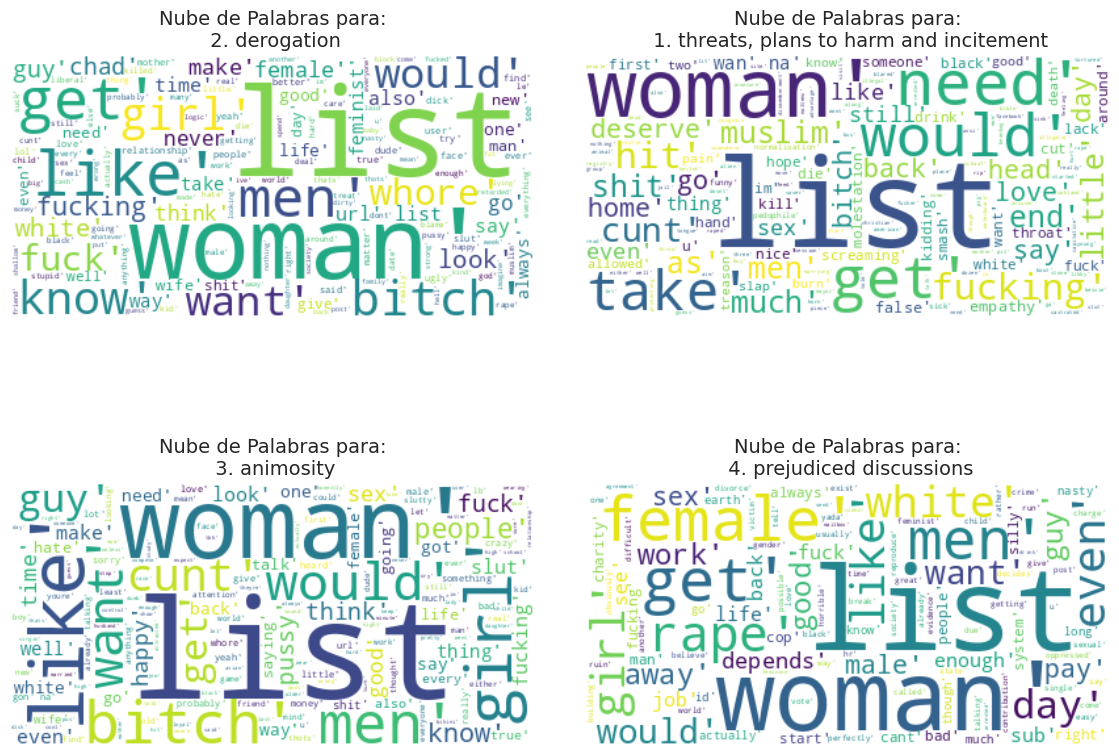

In [ ]:
# Generar nubes de palabras para cada categoría
categories = datos['label_category'].unique()

# Crear una figura con subgráficas (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

for i, category in enumerate(categories):
    # Filtrar comentarios por categoría
    text = datos[datos['label_category'] == category]['cleaned_text'].values

    # Crear una nube de palabras
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(str(text))

    # Mostrar la nube de palabras en el subplot correspondiente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')  # Ocultar ejes
    axes[i].set_title(f'Nube de Palabras para:\n {category}', fontsize=14)

# Ajustar el espacio entre subgráficas
plt.tight_layout(pad=3.0)
plt.show()

## 🔹 **Vectorización de los datos**


Convierte los comentarios de texto en una representación numérica que puede ser utilizada por algoritmos de aprendizaje automático.

* **Bag of Words** - BoW (Bolsa de Palabras): convierte el texto en una matriz de conteos de palabras.
* **TF-IDF** (Frecuencia de Término - Frecuencia Inversa de Documento): no solo cuenta las ocurrencias de palabras, sino que también considera su importancia en el conjunto de datos. Reduce el peso de las palabras comunes y aumenta el peso de las palabras raras.


### BoW:

In [ ]:
comentarios = datos['cleaned_text']
# Crear una instancia de CountVectorizer
vectorizador_bow = CountVectorizer(min_df=0.005)

# Ajustar y transformar los datos
X_bow = vectorizador_bow.fit_transform(comentarios)

# Convertir a un DataFrame para visualizar
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizador_bow.get_feature_names_out())
print(df_bow)

AttributeError: 'list' object has no attribute 'lower'

### TF-IDF:

In [ ]:
# Crear una instancia de TfidfVectorizer
vectorizador2 = TfidfVectorizer(min_df=0.005)

# Ajustar y transformar los datos
vect2 = vectorizador2.fit_transform(comentarios)

# Convertir a un DataFrame para visualizar
df_temp = datos.drop(['text', 'cleaned_text'], axis=1)
df_text = pd.DataFrame(data = vect2.toarray(), columns=vectorizador2.get_feature_names_out())
#print(df_text)
#print(vect2.shape)

df_temp.reset_index(drop=True, inplace=True)
df_text.reset_index(drop=True, inplace=True)

df_new = pd.concat([df_temp, df_text], axis=1)
df_new.head()

AttributeError: 'list' object has no attribute 'lower'

## 🔹 **(*Podría hacerse*) Análisis de Sentimiento o Clasificación**

***Diccionario de Sentimiento:*** *Usar un diccionario que contenga palabras o frases que se consideran sexistas o discriminatorias. Esto puede ser útil en la fase de análisis para identificar patrones en los comentarios.*

# 🟠 **Seleccionar el modelo**

## 🔸 **Regresión:**

**Dividir el Dataset:** Separar los datos sexistas en conjuntos de entrenamiento y prueba.

**Evaluación**: Resultado de ***Accuracy***

*Con el resultado de la matriz de confusion y el accuracy se sabrá si el desbalanceamiento afecta o no afecta a los resultados, si lo afecta entonces si se debe balancearlos.*

*También se sabrá si el modelo está sobreajustado (**Overfitting**) o **Underfitting**, un buen resultado es un accuracy arriba del 90%*

***Lasso***, *para saber que variables no son importantes en el modelo (**selección de características**), y que se pueden quitar*

**Balanceando los datos (*si es necesario*):**